In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI, Data Science & Analytics/mall.csv')

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Choosing 2 dimensions for easy plotting
X = df.iloc[:, [3,4]].values

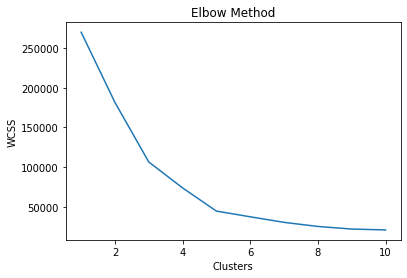

In [ ]:
#Using Elbow method
from sklearn.cluster import KMeans
wcss = []
#Within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Here, no. of clusters should be 5.

In [ ]:
#Applying KMeans algorithm to the dataset

kmeans= KMeans(n_clusters = 5, random_state = None, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

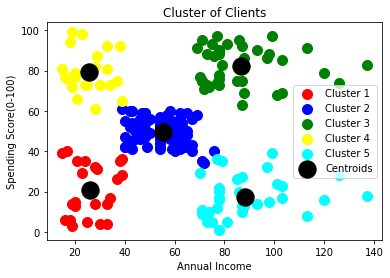

In [ ]:
#s - markersize
#c - color
#Visualizing the clusters.
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans ==0,1], s = 100, c="red", label = "Cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans ==1,1], s = 100, c="blue", label = "Cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans ==2,1], s = 100, c="green", label = "Cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans ==3,1], s = 100, c="yellow", label = "Cluster 4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans ==4,1], s = 100, c="cyan", label = "Cluster 5")
#plt.scatter(X[y_kmeans==5, 0], X[y_kmeans ==5,1], s = 100, c="purple", label = "Cluster 6")
#plt.scatter(X[y_kmeans==6, 0], X[y_kmeans ==6,1], s = 100, c="orange", label = "Cluster 7")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="black", label = "Centroids")

plt.title("Cluster of Clients")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(0-100)")
plt.legend()
plt.show()